<a href="https://colab.research.google.com/github/seiji0203/Machine-Learning-Models/blob/master/k%E8%BF%91%E5%82%8D%E6%B3%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
# モジュールのインポート
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier

### クラス0、1に対応するデータ点の作成

In [16]:
x0 = np.random.normal(size=50).reshape(-1, 2) - 1 #(-1, -1)を中心とした正規分布
x1 = np.random.normal(size=50).reshape(-1, 2) + 1 #(1, 1)を中心とした正規分布
X_train = np.concatenate([x0, x1])

# 教師データの作成
y_train = np.concatenate([np.zeros(25), np.ones(25)]).astype(np.int)

#データ形状の確認
print("x0:{}, x1:{}, X_train:{}, y_train:{}".format(x0.shape, x1.shape, X_train.shape, y_train.shape))

x0:(25, 2), x1:(25, 2), X_train:(50, 2), y_train:(50,)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(-3.5, 3.5)

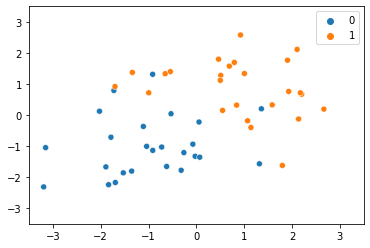

In [11]:
sns.scatterplot(X_train[:,0], X_train[:,1], hue=y_train)
plt.xlim(-3.5, 3.5)
plt.ylim(-3.5, 3.5)

### k-近傍法による分類


In [12]:
# 予測したいデータ点の作成
x = np.random.normal(size=2).reshape(-1, 2)
print(x)

[[-2.07803994 -0.19130718]]


In [17]:
# kの設定
n_neighbors = 3
# モデルの学習
knc = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X_train, y_train)
# テストデータの分類予測
y_pred = knc.predict(x)
print(y_pred)

[0]


予測結果＝クラス0

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


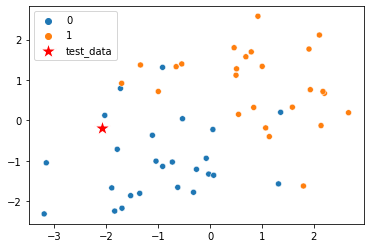

In [14]:
# 可視化
sns.scatterplot(X_train[:,0], X_train[:,1], hue=y_train)
sns.scatterplot(x[:,0], x[:,1], color='r', marker='*', s=300, label='test_data')

### ハイパーパラメータkが分類境界に与える影響

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

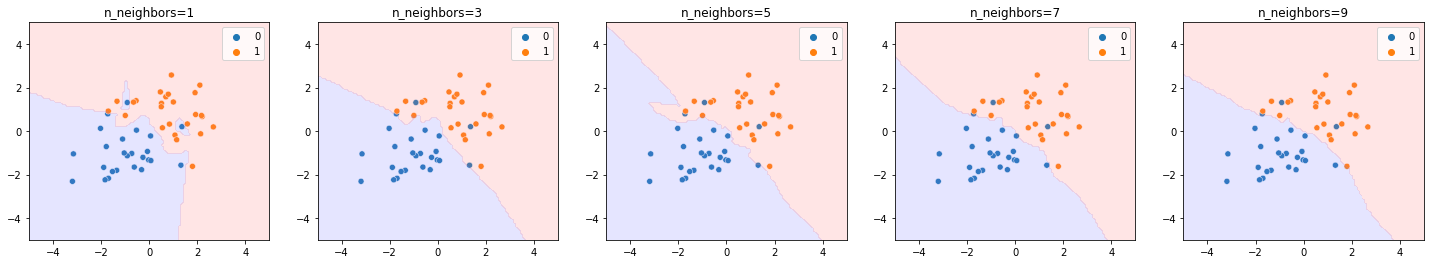

In [15]:
xx0, xx1 = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))
X_test = np.array([xx0, xx1]).reshape(2, -1).T

fig, axes = plt.subplots(1, 5, figsize=(25,4))

for i, ax in zip(range(5), axes.flat):
  n_neighbors = i*2 + 1
  knc = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X_train, y_train)
  y_pred = knc.predict(X_test)

  sns.scatterplot(X_train[:, 0], X_train[:, 1], hue=y_train, ax=ax)
  axes[i].contourf(xx0, xx1, y_pred.reshape(100, 100).astype(dtype=np.float), alpha=0.2, levels=np.linspace(0, 1, 3), cmap='bwr')
  axes[i].set_title('n_neighbors={:.0f}'.format(n_neighbors))

plt.show()

kの値を変えることで、分類モデルの複雑さを制御できていることがわかります。